 ## NATURAL LANGUAGE PROCESSING PROJECT (PECCS60S602B)

# TOPIC: Sentiment Analysis and Topic Modeling of Russia-Ukraine War-related Tweets

![](http://nonprod-media.webdunia.com/public_html/_media/en/img/article/2022-02/18/full/1645176088-5308.jpg)

### TEAM MEMEBERS:

1. Munshi Mohammad Zunejo, 12020002002155, 116
2. Shinjini Rahut, 12020002002169, 130
3.  Sayantan Pal, 12020002002144, 105
4. Chirantan Paul, 12020002002168, 129

## Setup for Sentiment Analysis and Topic Modeling

1. importing packages
2. Reading the Data
3. Data Pre-processing
4. Subjectivity and Polarity
5. Plotting Word Cloud
6. Computing the sentiment of the tweets
7. Get the percentages of positive, negative and neutral tweets
8. Visualization
9. Topic Modeling in Python using Latent Dirichlet Allocation (LDA)

#### Implementation of the model:
    1. Data Cleaning
    2. Phrase Modeling: Bi-grams and Tri-grams
    3. Data Transformation: Corpus and Dictionary
    4. Base Model
    5. Hyper-parameter Tuning
    6. Final model
    
10. Conclusion

In [143]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use("ggplot")

In [144]:
# Reading the data
df = pd.read_csv("/kaggle/input/scrappedtweets/st.csv")

In [145]:
df.head()

,Datetime,Tweet Id,Text,Username
0,2023-04-13 02:56:08+00:00,1.646350e+18,"#Ukraine: In the video, a Ukrainian soldier wi...",WeaponsWarfare
1,2023-04-12 10:38:53+00:00,1.646100e+18,#Ukraine: A very rare video of a Ukrainian BSE...,WeaponsWarfare
2,2023-04-12 02:50:37+00:00,1.645980e+18,#Ukraine: Very rare video - American馃嚭馃嚥 BATT ...,WeaponsWarfare
3,2023-04-07 18:01:33+00:00,1.644400e+18,"鈿★笍馃摙 Romanian media reports, that: ""Armenia i...",ScourgeOfTengri
4,2023-04-07 07:36:00+00:00,1.644240e+18,The Ukrainian counter-offensive is likely to b...,ukraine_world


## Data Preprocessing

### Cleaning the tweets

In [146]:
# Function to clean the tweets
def cleanTweets(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) # Remove mentions
    tweet = re.sub(r'#', '', tweet)  # Remove hashtags
    tweet = re.sub(r'RT[\s]+', '', tweet)  # Remove retweets
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)  # Remove links
    
    return tweet

df["Text"] = df["Text"].apply(cleanTweets)

In [147]:
df.head()

,Datetime,Tweet Id,Text,Username
0,2023-04-13 02:56:08+00:00,1.646350e+18,"Ukraine: In the video, a Ukrainian soldier wit...",WeaponsWarfare
1,2023-04-12 10:38:53+00:00,1.646100e+18,Ukraine: A very rare video of a Ukrainian BSEM...,WeaponsWarfare
2,2023-04-12 02:50:37+00:00,1.645980e+18,Ukraine: Very rare video - American馃嚭馃嚥 BATT U...,WeaponsWarfare
3,2023-04-07 18:01:33+00:00,1.644400e+18,"鈿★笍馃摙 Romanian media reports, that: ""Armenia i...",ScourgeOfTengri
4,2023-04-07 07:36:00+00:00,1.644240e+18,The Ukrainian counter-offensive is likely to b...,ukraine_world


### Subjectivity

In [148]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

### Polarity

In [149]:
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

### Add the Subjectivity and Polarity columns

In [150]:
df["Subjectivity"] = df["Text"].apply(getSubjectivity)
df["Polarity"] = df["Text"].apply(getPolarity)

df

,Datetime,Tweet Id,Text,Username,Subjectivity,Polarity
0,2023-04-13 02:56:08+00:00,1.646350e+18,"Ukraine: In the video, a Ukrainian soldier wit...",WeaponsWarfare,0.321429,0.166667
1,2023-04-12 10:38:53+00:00,1.646100e+18,Ukraine: A very rare video of a Ukrainian BSEM...,WeaponsWarfare,1.000000,0.390000
2,2023-04-12 02:50:37+00:00,1.645980e+18,Ukraine: Very rare video - American馃嚭馃嚥 BATT U...,WeaponsWarfare,0.500000,0.195000
3,2023-04-07 18:01:33+00:00,1.644400e+18,"鈿★笍馃摙 Romanian media reports, that: ""Armenia i...",ScourgeOfTengri,0.050000,-0.050000
4,2023-04-07 07:36:00+00:00,1.644240e+18,The Ukrainian counter-offensive is likely to b...,ukraine_world,1.000000,0.000000
...,...,...,...,...,...,...
1194,2023-03-24 06:15:00+00:00,1.639150e+18,Italian Prime Minister Giorgia Meloni made an ...,UATV_en,0.216667,0.000000
1195,2023-03-24 04:58:48+00:00,1.639130e+18,鈿♀殹鈿n attempt by the Russians to advance on o...,UkraineNewsLive,0.300000,-0.500000
1196,2023-03-24 03:29:32+00:00,1.639110e+18,Italy PM Meloni yelling in Parliament for supp...,ProfessorsBlogg,0.650000,0.400000
1197,2023-03-24 02:08:57+00:00,1.639090e+18,UkraineRussiaWar is the most propagandized war...,LucasGage584,0.500000,0.500000


### Plotting Word Cloud

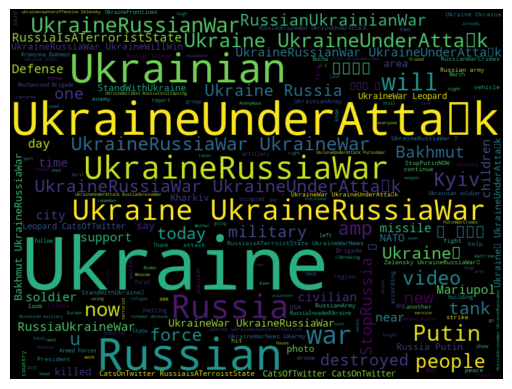

In [151]:
allWords = ' '.join( [twts for twts in df["Text"]] )
wordCloud = WordCloud(width=800, height=600, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [152]:
# Save word cloud
wordCloud.to_file("word-cloud.png")

### Computing the sentiment of the tweets

In [153]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [154]:
# Applying getAnalysis function
df["Analysis"] = df["Polarity"].apply(getAnalysis)
df

,Datetime,Tweet Id,Text,Username,Subjectivity,Polarity,Analysis
0,2023-04-13 02:56:08+00:00,1.646350e+18,"Ukraine: In the video, a Ukrainian soldier wit...",WeaponsWarfare,0.321429,0.166667,Positive
1,2023-04-12 10:38:53+00:00,1.646100e+18,Ukraine: A very rare video of a Ukrainian BSEM...,WeaponsWarfare,1.000000,0.390000,Positive
2,2023-04-12 02:50:37+00:00,1.645980e+18,Ukraine: Very rare video - American馃嚭馃嚥 BATT U...,WeaponsWarfare,0.500000,0.195000,Positive
3,2023-04-07 18:01:33+00:00,1.644400e+18,"鈿★笍馃摙 Romanian media reports, that: ""Armenia i...",ScourgeOfTengri,0.050000,-0.050000,Negative
4,2023-04-07 07:36:00+00:00,1.644240e+18,The Ukrainian counter-offensive is likely to b...,ukraine_world,1.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
1194,2023-03-24 06:15:00+00:00,1.639150e+18,Italian Prime Minister Giorgia Meloni made an ...,UATV_en,0.216667,0.000000,Neutral
1195,2023-03-24 04:58:48+00:00,1.639130e+18,鈿♀殹鈿n attempt by the Russians to advance on o...,UkraineNewsLive,0.300000,-0.500000,Negative
1196,2023-03-24 03:29:32+00:00,1.639110e+18,Italy PM Meloni yelling in Parliament for supp...,ProfessorsBlogg,0.650000,0.400000,Positive
1197,2023-03-24 02:08:57+00:00,1.639090e+18,UkraineRussiaWar is the most propagandized war...,LucasGage584,0.500000,0.500000,Positive


### Get the percentages of positive, negative and neutral tweets

In [155]:
# Positive tweets
ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets["Text"]
positive_percentage = round((ptweets.shape[0]/df.shape[0] * 100), 2)
print(f'Percentage of positive tweets: {positive_percentage}')

Percentage of positive tweets: 36.86


In [156]:
# Negative tweets
ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets["Text"]
negetive_percentage = round((ntweets.shape[0]/df.shape[0] * 100), 2)
print(f'Percentage of negative tweets: {negetive_percentage}')

Percentage of negative tweets: 21.02


In [157]:
# Neutral tweets
neutweets = df[df.Analysis == "Neutral"]
neutweets = neutweets["Text"]
neutral_percentage = round((neutweets.shape[0]/df.shape[0] * 100), 2)
print(f'Percentage of neutral tweets: {neutral_percentage}')

Percentage of neutral tweets: 42.12


## Visualization

### Visualizing the value counts

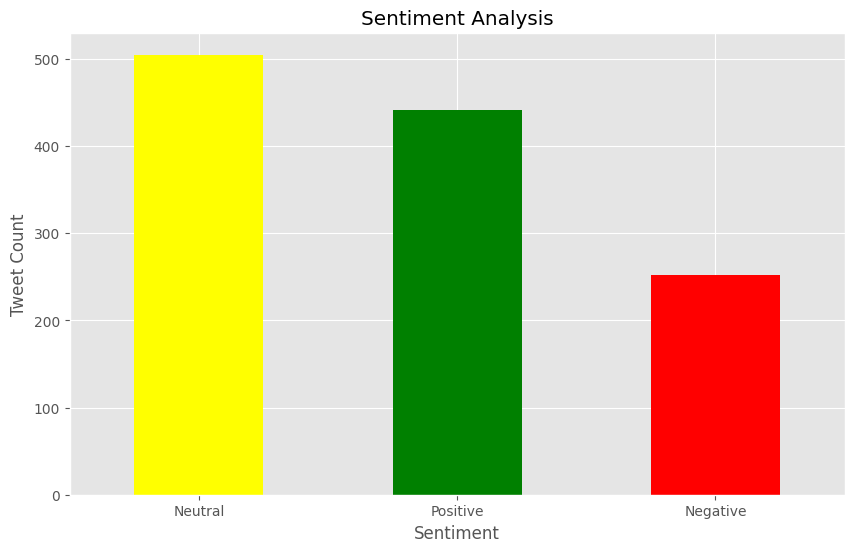

In [158]:
# Bar graph

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
df["Analysis"].value_counts().plot(kind="bar", figsize = (10, 6), color=["yellow", "green", "red"])
plt.xticks(rotation=0)
plt.show();

### Visualizing the subjectivity and polarity

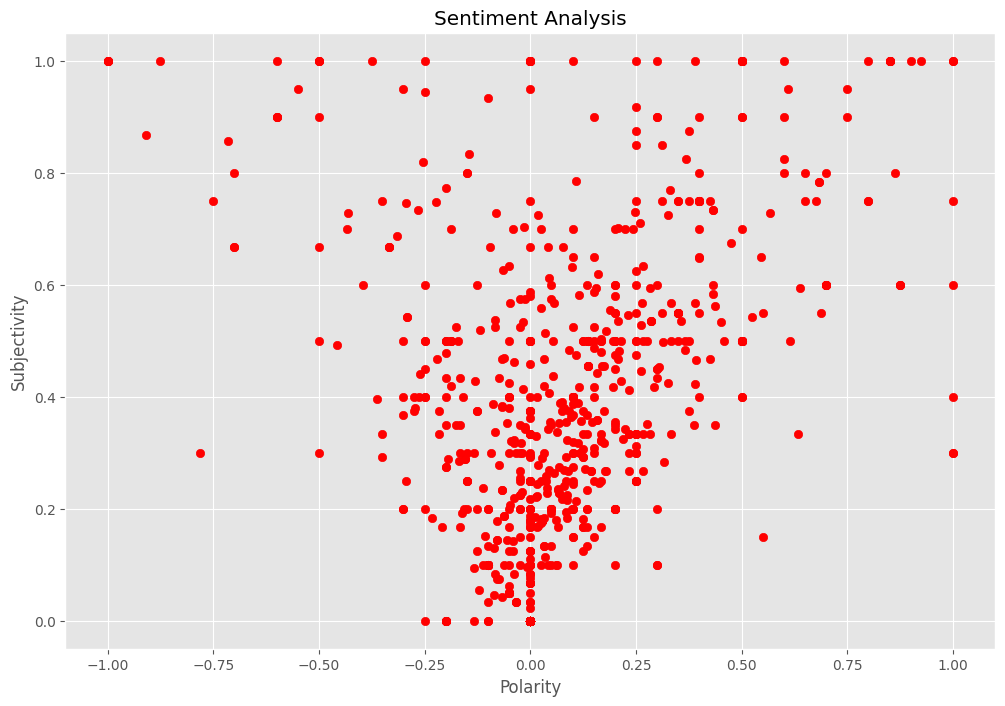

In [159]:
# Scatter plot
plt.figure(figsize=(12, 8))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Red")
    
plt.title("Sentiment Analysis") 
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show();

By processing and analyzing the data, the following were found:
1. Word Cloud generated and saved.
2. Percentage of positive tweets: 38.51.
3. Percentage of negative tweets: 22.35.
4. Percentage of neutral tweets: 39.14.

# Topic Modeling in Python using Latent Dirichlet Allocation (LDA)

Probabilistic topic models, such as LDA, are popular tools for text analysis, providing both a predictive and latent topic representation of the corpus. 
Here, we will focus on topic modeling approx 5000 tweets scrapped from twitter on Russia-Ukraine war.


## Data Cleaning

Since the goal of this analysis is to perform topic modeling, we will solely focus on the text data from each tweet and drop other metadata columns.

In [160]:
# Remove the columns
df = df.drop(columns=['Datetime', 'Tweet Id', 'Username', 
                              'Subjectivity', 'Polarity', 'Analysis'], axis=1)

# Print out the first rows of tweets
df.head()

,Text
0,"Ukraine: In the video, a Ukrainian soldier wit..."
1,Ukraine: A very rare video of a Ukrainian BSEM...
2,Ukraine: Very rare video - American馃嚭馃嚥 BATT U...
3,"鈿★笍馃摙 Romanian media reports, that: ""Armenia i..."
4,The Ukrainian counter-offensive is likely to b...


### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of text column to make them more amenable for analysis and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [161]:
# Load the regular expression library
import re

# Remove punctuation
df['text_processed'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df['text_processed'].head()

0    ukraine: in the video a ukrainian soldier with...
1    ukraine: a very rare video of a ukrainian bsem...
2    ukraine: very rare video - american馃嚭馃嚥 batt u...
3    鈿★笍馃摙 romanian media reports that: "armenia ig...
4    the ukrainian counter-offensive is likely to b...
Name: text_processed, dtype: object

### Tokenize words and further clean-up text

Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

In [162]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['ukraine', 'in', 'the', 'video', 'ukrainian', 'soldier', 'with', 'box', 'with', 'finnish', '馃嚝馃嚠', 'frag', 'hand', 'grenades', 'and', 'right', 'next', 'to', 'the', 'box', 'large', 'number', 'of', 'jva', 'fuses', 'russia', 'russia', 'kyiv', 'finland', 'ukrainewar']


## Phrase Modeling: Bigram and Trigram Models

Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

Gensim's Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold.

The higher the values of these param, the harder it is for words to be combined.

In [163]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

### Remove Stopwords, Make Bigrams and Lemmatize

The phrase models are ready. Let’s define the functions to remove the stopwords, make trigrams and lemmatization and call them sequentially.

In [164]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#### Let's call the functions in order.

In [166]:
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['video', 'frag', 'hand', 'grenade', 'right', 'next', 'box', 'large', 'number', 'fuse']


## Data transformation: Corpus and Dictionary

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [167]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


## Base Model

We have everything required to train the base LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well. Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior (we'll use default for the base model).

chunksize controls how many documents are processed at a time in the training algorithm. Increasing chunksize will speed up training, at least as long as the chunk of documents easily fit into memory.

passes controls how often we train the model on the entire corpus (set to 10). Another word for passes might be "epochs". iterations is somewhat technical, but essentially it controls how often we repeat a particular loop over each document. It is important to set the number of "passes" and "iterations" high enough.

In [168]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

The above LDA model is built with 10 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics()

In [169]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"strike" + 0.014*"new" + 0.013*"russian" + 0.011*"missile" + '
  '0.010*"destroy" + 0.009*"video" + 0.009*"footage" + 0.008*"kyiv" + '
  '0.008*"war" + 0.007*"air"'),
 (1,
  '0.030*"ukrainian" + 0.016*"map" + 0.013*"war" + 0.013*"ukraine" + '
  '0.013*"photo" + 0.011*"kill" + 0.010*"training" + 0.010*"volunteer" + '
  '0.009*"military" + 0.008*"russian"'),
 (2,
  '0.030*"position" + 0.023*"join" + 0.012*"guest" + 0.012*"fire" + '
  '0.010*"tonight" + 0.010*"go" + 0.009*"appear" + 0.009*"train" + '
  '0.008*"biden" + 0.008*"fighting"'),
 (3,
  '0.045*"ukrainewar" + 0.028*"uaarmy_zelensky" + '
  '0.028*"catsontwitter_ukrainewarnew" + 0.021*"ukraine" + '
  '0.021*"leopard_catsoftwitter" + 0.013*"animal" + 0.012*"good" + '
  '0.010*"help" + 0.009*"war" + 0.009*"dog"'),
 (4,
  '0.051*"russian" + 0.027*"ukrainian" + 0.020*"ukraine" + 0.015*"soldier" + '
  '0.014*"tank" + 0.013*"video" + 0.010*"vehicle" + 0.010*"military" + '
  '0.009*"destroy" + 0.008*"region"'),
 (5,
  '0.050*

#### Compute Model Perplexity and Coherence Score

Let's calculate the baseline coherence score

In [170]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4237994248485724


## Hyperparameter tuning

First, let's differentiate between model hyperparameters and model parameters :

Model hyperparameters can be thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or in our case, number of topics K

Model parameters can be thought of as what the model learns during training, such as the weights for each word in a given topic.

Now that we have the baseline coherence score for the default LDA model, let's perform a series of sensitivity tests to help determine the following model hyperparameters:

Number of Topics (K)
Dirichlet hyperparameter alpha: Document-Topic Density
Dirichlet hyperparameter beta: Word-Topic Density
We'll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two difference validation corpus sets. We'll use C_v as our choice of metric for performance comparison

In [171]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

Let's call the function, and iterate it over the range of topics, alpha, and beta parameter values

In [172]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('./lda_tuning_results.csv', index=False)
    pbar.close()


  4%|▍         | 21/540 [39:03<16:05:23, 111.61s/it]

100%|██████████| 540/540 [25:41<00:00,  2.85s/it]


## Final Model

Based on external evaluation (Code to be added from Excel based analysis), let's train the final model with parameters yielding highest coherence score

In [173]:
num_topics = 8

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [174]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"bakhmut" + 0.005*"read" + 0.004*"map" + 0.004*"maps_include" + '
  '0.004*"situation_detaile" + 0.003*"day_summary" + 0.002*"rd" + 0.002*"war" '
  '+ 0.002*"brigade" + 0.002*"remain"'),
 (1,
  '0.002*"kill" + 0.002*"refugee" + 0.002*"war" + 0.002*"covid" + 0.002*"need" '
  '+ 0.002*"help" + 0.002*"evil" + 0.002*"leave" + 0.001*"today" + 0.001*"go"'),
 (2,
  '0.004*"guest" + 0.004*"join" + 0.004*"russian" + 0.003*"say" + 0.003*"go" + '
  '0.003*"mother" + 0.003*"moat" + 0.002*"biden" + 0.002*"tonight" + '
  '0.002*"sunday_馃嚞馃嚙"'),
 (3,
  '0.010*"ukrainewar" + 0.009*"uaarmy_zelensky" + '
  '0.009*"catsontwitter_ukrainewarnew" + 0.007*"ukraine" + '
  '0.007*"leopard_catsoftwitter" + 0.006*"ukrainian" + 0.004*"photo" + '
  '0.003*"animal" + 0.003*"dog" + 0.003*"kill"'),
 (4,
  '0.029*"russian" + 0.020*"ukrainian" + 0.010*"ukraine" + 0.008*"soldier" + '
  '0.008*"tank" + 0.007*"destroy" + 0.006*"video" + 0.006*"military" + '
  '0.006*"brigade" + 0.005*"position"'),
 (5,
  '0.

## Conclusion

By processing and analyzing the data, the following were found:
1. Word Cloud generated and saved.
2. Percentage of positive tweets: 38.51.
3. Percentage of negative tweets: 22.35.
4. Percentage of neutral tweets: 39.14.